In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("housing.csv")

In [3]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
df.dropna(inplace=True)

In [6]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [7]:
df["ocean_proximity"].unique() 

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [8]:
df["ocean_proximity"] = df["ocean_proximity"].astype("category")

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X = df.drop(["median_house_value"], axis = 1) #target'ı çıkartıyoruz
Y = df["median_house_value"] #target value

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2)

In [14]:
train_data = X_train.join(Y_train)

In [15]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
4274,-118.33,34.09,30.0,1679.0,682.0,1445.0,579.0,2.1403,<1H OCEAN,200000.0
1684,-122.31,38.01,18.0,4123.0,874.0,1895.0,772.0,3.2759,NEAR BAY,195000.0
19423,-121.04,37.69,5.0,9601.0,1639.0,4449.0,1575.0,4.5332,INLAND,195500.0
4053,-118.43,34.15,26.0,2900.0,667.0,1090.0,590.0,3.7125,<1H OCEAN,447400.0
12344,-116.50,33.82,16.0,343.0,85.0,29.0,14.0,2.1042,INLAND,87500.0
...,...,...,...,...,...,...,...,...,...,...
16125,-122.47,37.79,52.0,2844.0,623.0,1380.0,596.0,4.7500,NEAR BAY,500001.0
16700,-120.61,35.10,17.0,2799.0,637.0,2015.0,592.0,3.0536,<1H OCEAN,143600.0
1869,-119.95,38.95,21.0,2046.0,580.0,952.0,353.0,1.7245,INLAND,92200.0
9926,-122.31,38.30,25.0,3883.0,740.0,1641.0,676.0,3.9000,NEAR BAY,187300.0


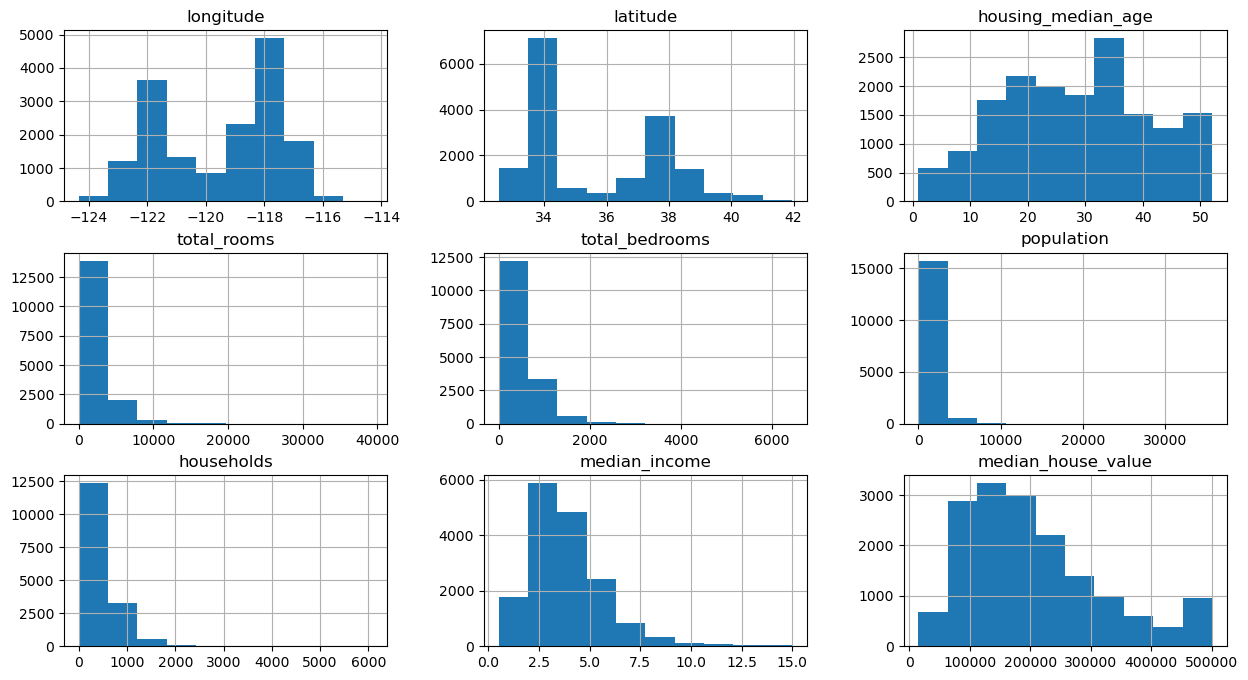

In [16]:
train_data.hist(figsize=(15,8));

In [17]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(["ocean_proximity"],axis=1)


In [18]:
train_data = train_data.replace({True: 1, False: 0})

<Axes: >

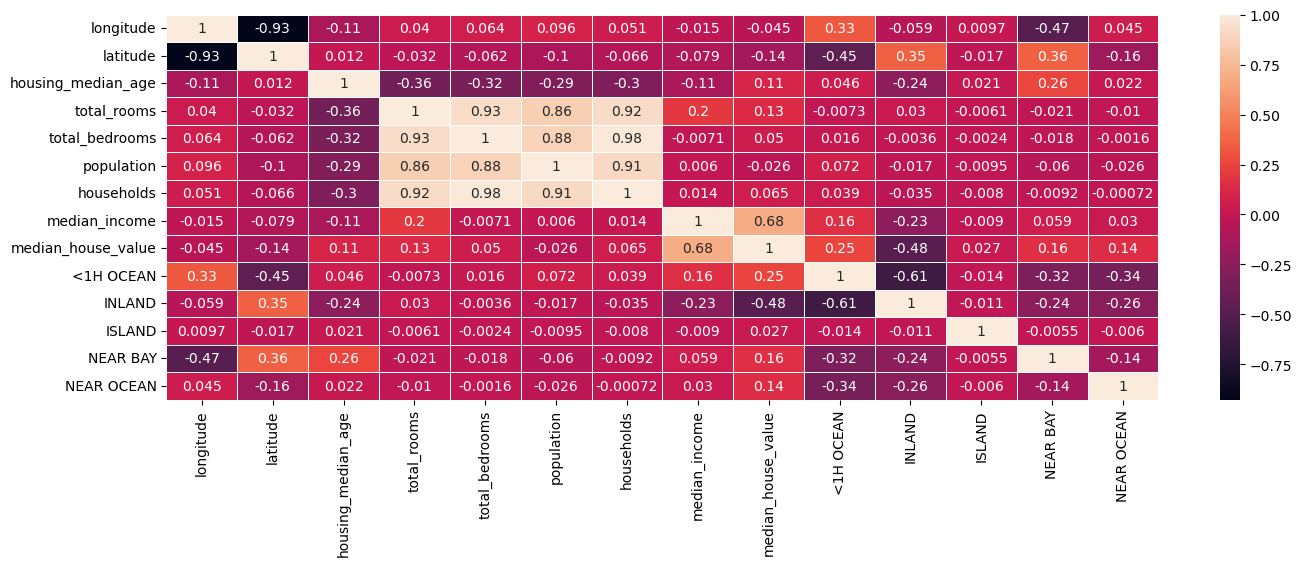

In [19]:
plt.figure(figsize = (16,5))
sns.heatmap(train_data.corr(), annot=True, linewidth=0.5)


In [54]:
from sklearn.linear_model import LinearRegression

In [32]:
X_train, Y_train = train_data.drop(["median_house_value"], axis=1), train_data["median_house_value"]
reg=LinearRegression()

In [33]:
reg.fit(X_train, Y_train)

LinearRegression()

In [61]:
train_data[train_data.columns[9:]].astype(bool)

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
4274,True,False,False,False,False
1684,False,False,False,True,False
19423,False,True,False,False,False
4053,True,False,False,False,False
12344,False,True,False,False,False
...,...,...,...,...,...
16125,False,False,False,True,False
16700,True,False,False,False,False
1869,False,True,False,False,False
9926,False,False,False,True,False


In [50]:
test_data = X_test.join(Y_test)

In [51]:
test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(["ocean_proximity"],axis=1)

In [52]:
test_data = test_data.replace({True: 1, False: 0})

In [64]:
X_test, Y_test = test_data.drop(["median_house_value"], axis=1), test_data["median_house_value"]

In [65]:
reg.score(X_test, Y_test)

0.6549291079784227